In [1]:
from typing import List

In [2]:
import numpy as np

In [3]:
from pathlib import Path

In [4]:
import pandas as pd

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10


In [6]:
import matplotlib.pyplot as plt

In [7]:
root = Path("/home/mrafaat/AliThesis/logs/semantic_kitti/lidar/MONTH_11_DAY_22_HOUR_02_MIN_43_SEC_46/targets/")

In [8]:
seq_08_targets_path = list(Path("/home/mrafaat/AliThesis/logs/semantic_kitti/lidar/MONTH_11_DAY_22_HOUR_02_MIN_43_SEC_46/targets/08/").rglob("*.npy"))

In [9]:
def get_stats(files):
    ret = {}
    for p in files:
        data = np.load(str(p))
        cls, counts = np.unique(data, return_counts='True')
        for cl, count in zip(cls, counts):
            if cl in ret:
                ret[cl] += count
            else:
                ret[cl] = count
    return ret
        

In [10]:
_08_stats = get_stats(seq_08_targets_path)

In [11]:
labels = {  
0: "unlabeled",
  1: "car",
  2: "bicycle",
  3: "motorcycle",
  4: "truck",
  5: "other-vehicle",
  6: "person",
  7: "bicyclist",
  8:  "motorcyclist",
  9:  "road",
  10: "parking",
  11: "sidewalk",
  12: "other-ground",
  13: "building",
  14: "fence",
  15: "vegetation",
  16: "trunk",
  17: "terrain",
  18:  "pole",
  19: "traffic-sign",
}

In [12]:
def convert2text(counts, labels):
    ret = {}
    for k, v in counts.items():
        ret[labels[k]] = v
    return ret

In [13]:
convert2text(_08_stats,labels)

{'car': 6384456,
 'road': 21434123,
 'sidewalk': 8148599,
 'building': 6303867,
 'fence': 1690890,
 'vegetation': 20391195,
 'trunk': 881711,
 'terrain': 8124965,
 'pole': 317250,
 'traffic-sign': 63608,
 'other-ground': 67293,
 'bicyclist': 128714,
 'bicycle': 43691,
 'other-vehicle': 471205,
 'parking': 973729,
 'person': 126544,
 'motorcyclist': 5000,
 'motorcycle': 51617,
 'truck': 101007}

In [14]:
seqs =  ['00',
        '02',
        '03',
        '04',
        '05',
        '06',
        '09',
        '10',
        '07',
        '01',
        '08']

In [15]:
def get_stats_file(root, seqs, labels):
    dfs = []
    for seq in seqs:
        print(seq)
        seq_files = seq_08_targets_path = list((root / seq).rglob("*.npy"))
        seq_stats = get_stats(seq_08_targets_path)
        seq_stats = convert2text(seq_stats,labels)
        seq_df = pd.DataFrame({seq: seq_stats})
        dfs.append(seq_df)
    return dfs

In [16]:
def preprocess(dfs):
    df = pd.concat(dfs, axis=1)
    df = df.fillna(0)
    return df

In [17]:
dfs = get_stats_file(root, seqs, labels)

00
02
03
04
05
06
09
10
07
01
08


In [18]:
df = preprocess(dfs)

In [19]:
df

,00,02,03,04,05,06,09,10,07,01,08
bicycle,23198,2923.0,1661.0,0.0,1256.0,10409.0,728.0,0.0,8733.0,0.0,43691
bicyclist,34171,2.0,0.0,0.0,30929.0,9246.0,0.0,0.0,6526.0,0.0,128714
building,15323722,3107353.0,350870.0,64945.0,6419934.0,1443240.0,1970130.0,2489159.0,3559639.0,8321.0,6303867
car,9215305,2539967.0,272157.0,106595.0,2110663.0,1017860.0,1357824.0,674487.0,2709215.0,124910.0,6384456
fence,2480014,7389746.0,785998.0,349584.0,6518330.0,350647.0,1595440.0,2964761.0,903651.0,2239544.0,1690890
motorcycle,105838,15115.0,0.0,0.0,155.0,7311.0,15892.0,2185.0,38186.0,0.0,51617
motorcyclist,2219,77437.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,396.0,5000
other-ground,141,96191.0,64.0,6488.0,128537.0,417789.0,28684.0,109255.0,0.0,428573.0,67293
other-vehicle,203150,58603.0,20932.0,0.0,220276.0,254544.0,144972.0,922.0,123440.0,0.0,471205
parking,1062057,1744532.0,145404.0,809.0,594417.0,147314.0,374340.0,146117.0,278589.0,0.0,973729


In [20]:
df['08']

bicycle             43691
bicyclist          128714
building          6303867
car               6384456
fence             1690890
motorcycle          51617
motorcyclist         5000
other-ground        67293
other-vehicle      471205
parking            973729
person             126544
pole               317250
road             21434123
sidewalk          8148599
terrain           8124965
traffic-sign        63608
truck              101007
trunk              881711
vegetation       20391195
Name: 08, dtype: int64

Text(0.5, 0, 'Number of Points (log scale)')

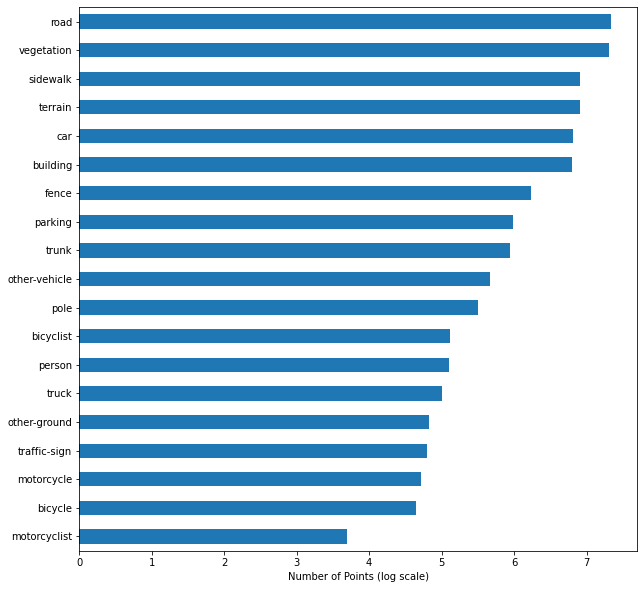

In [21]:
seq_08_ax = (np.log10(df['08'])).sort_values().plot.barh()
seq_08_ax.set_xlabel("Number of Points (log scale)")

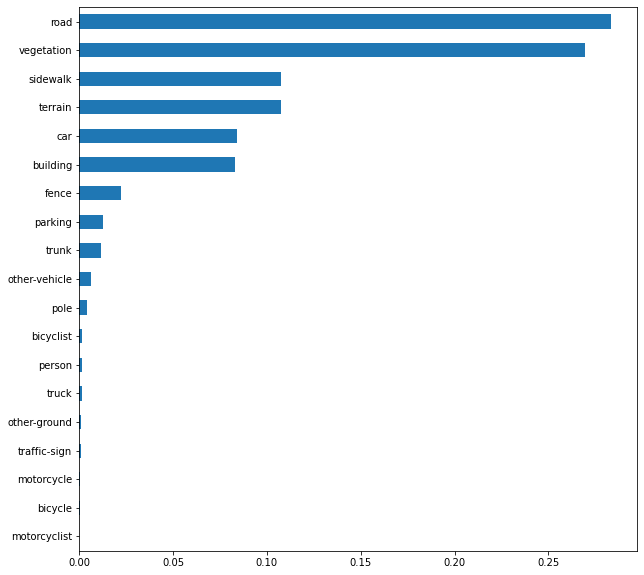

In [22]:
seq_08_ax = (df['08'] / df['08'].sum()).sort_values().plot.barh()

In [23]:
( df['08'] / df['08'].sum()).sort_values(ascending=False)

road             0.283110
vegetation       0.269335
sidewalk         0.107630
terrain          0.107318
car              0.084328
building         0.083264
fence            0.022334
parking          0.012861
trunk            0.011646
other-vehicle    0.006224
pole             0.004190
bicyclist        0.001700
person           0.001671
truck            0.001334
other-ground     0.000889
traffic-sign     0.000840
motorcycle       0.000682
bicycle          0.000577
motorcyclist     0.000066
Name: 08, dtype: float64

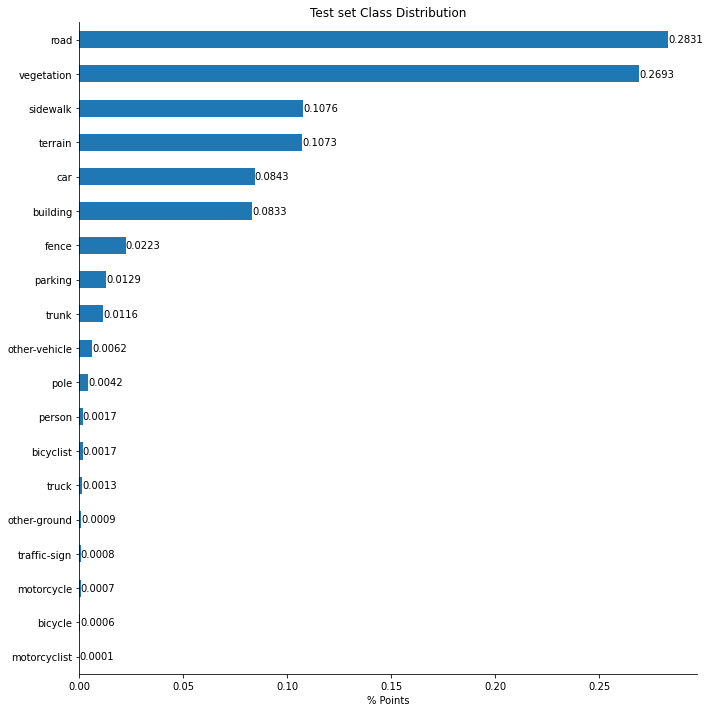

In [51]:
seq_08_ax = ( df['08'] / df['08'].sum()).round(4).sort_values(ascending=True).plot.barh()
seq_08_ax.set_xlabel("% Points")
seq_08_ax.bar_label(seq_08_ax.containers[0])
seq_08_ax.set_title("Test set Class Distribution")
seq_08_ax.spines['top'].set_visible(False)
seq_08_ax.spines['right'].set_visible(False)
# seq_08_ax.spines['bottom'].set_visible(False)
# seq_08_ax.spines['left'].set_visible(False)
seq_08_ax.get_figure().tight_layout()
seq_08_ax.get_figure().savefig("seq_08.png")


In [24]:
np.log10(5000)

3.6989700043360187

<AxesSubplot:>

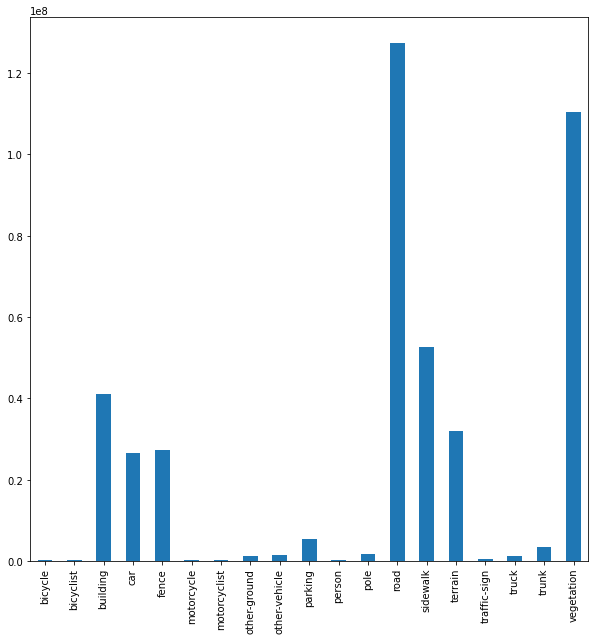

In [25]:
df.sum(axis=1).plot.bar()

In [26]:
df['total'] = df.sum(axis=1)

<AxesSubplot:>

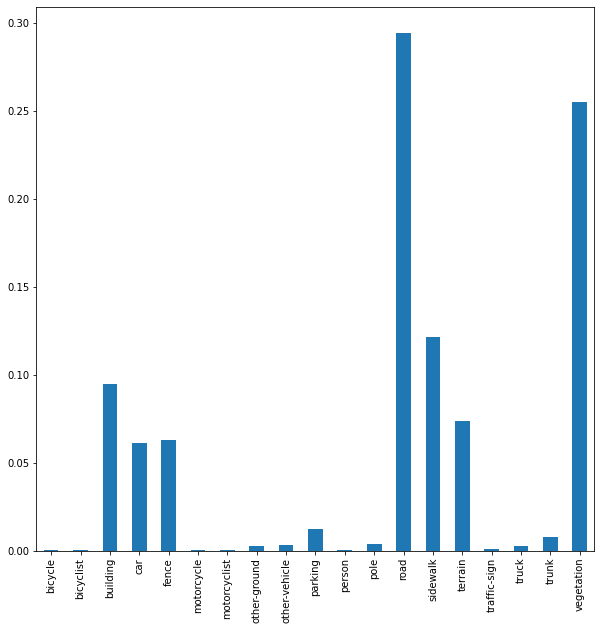

In [27]:
( df['total'] / df['total'].sum()).plot.bar()

In [28]:
( df['total'] / df['total'].sum()).sort_values(ascending=False)

road             0.294226
vegetation       0.255071
sidewalk         0.121254
building         0.094796
terrain          0.074025
fence            0.062984
car              0.061240
parking          0.012628
trunk            0.008008
pole             0.003789
other-vehicle    0.003460
other-ground     0.002963
truck            0.002604
traffic-sign     0.000828
person           0.000682
motorcycle       0.000546
bicyclist        0.000484
bicycle          0.000214
motorcyclist     0.000196
Name: total, dtype: float64

[Text(0, 0, '4.92968'),
 Text(0, 0, '4.96661'),
 Text(0, 0, '5.32137'),
 Text(0, 0, '5.37346'),
 Text(0, 0, '5.47051'),
 Text(0, 0, '5.55471'),
 Text(0, 0, '6.05209'),
 Text(0, 0, '6.10823'),
 Text(0, 0, '6.17552'),
 Text(0, 0, '6.215'),
 Text(0, 0, '6.53996'),
 Text(0, 0, '6.73777'),
 Text(0, 0, '7.42347'),
 Text(0, 0, '7.43566'),
 Text(0, 0, '7.50581'),
 Text(0, 0, '7.61322'),
 Text(0, 0, '7.72013'),
 Text(0, 0, '8.04309'),
 Text(0, 0, '8.10511')]

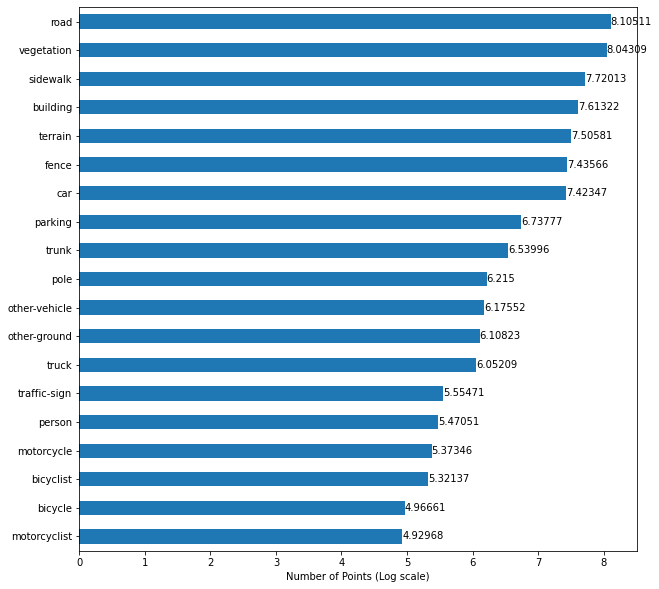

In [29]:
total_ax = ( np.log10(df['total'])).sort_values(ascending=True).plot.barh()
total_ax.set_xlabel("Number of Points (Log scale)")
total_ax.bar_label(total_ax.containers[0])

In [30]:
df

,00,02,03,04,05,06,09,10,07,01,08,total
bicycle,23198,2923.0,1661.0,0.0,1256.0,10409.0,728.0,0.0,8733.0,0.0,43691,92599.0
bicyclist,34171,2.0,0.0,0.0,30929.0,9246.0,0.0,0.0,6526.0,0.0,128714,209588.0
building,15323722,3107353.0,350870.0,64945.0,6419934.0,1443240.0,1970130.0,2489159.0,3559639.0,8321.0,6303867,41041180.0
car,9215305,2539967.0,272157.0,106595.0,2110663.0,1017860.0,1357824.0,674487.0,2709215.0,124910.0,6384456,26513439.0
fence,2480014,7389746.0,785998.0,349584.0,6518330.0,350647.0,1595440.0,2964761.0,903651.0,2239544.0,1690890,27268605.0
motorcycle,105838,15115.0,0.0,0.0,155.0,7311.0,15892.0,2185.0,38186.0,0.0,51617,236299.0
motorcyclist,2219,77437.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,396.0,5000,85052.0
other-ground,141,96191.0,64.0,6488.0,128537.0,417789.0,28684.0,109255.0,0.0,428573.0,67293,1283015.0
other-vehicle,203150,58603.0,20932.0,0.0,220276.0,254544.0,144972.0,922.0,123440.0,0.0,471205,1498044.0
parking,1062057,1744532.0,145404.0,809.0,594417.0,147314.0,374340.0,146117.0,278589.0,0.0,973729,5467308.0


In [31]:
df["percentage"] = ( df["total"] / df["total"].sum())*100

In [32]:
df.sort_values(by="total", ascending=False)

,00,02,03,04,05,06,09,10,07,01,08,total,percentage
road,22046627,25798438.0,4514741.0,2206758.0,14009989.0,6554390.0,9837359.0,6098416.0,5800594.0,9081653.0,21434123,127383088.0,29.422608
vegetation,18908065,28139363.0,5669009.0,1505323.0,12525404.0,1528454.0,7977617.0,7117192.0,3424274.0,3245264.0,20391195,110431160.0,25.507096
sidewalk,9209718,14694664.0,1625061.0,445398.0,7859744.0,2144120.0,4190737.0,2061808.0,2115740.0,296.0,8148599,52495885.0,12.125360
building,15323722,3107353.0,350870.0,64945.0,6419934.0,1443240.0,1970130.0,2489159.0,3559639.0,8321.0,6303867,41041180.0,9.479583
terrain,3870608,3997159.0,1340675.0,494033.0,2340094.0,4743191.0,2400647.0,1448616.0,1280714.0,2007727.0,8124965,32048429.0,7.402461
fence,2480014,7389746.0,785998.0,349584.0,6518330.0,350647.0,1595440.0,2964761.0,903651.0,2239544.0,1690890,27268605.0,6.298430
car,9215305,2539967.0,272157.0,106595.0,2110663.0,1017860.0,1357824.0,674487.0,2709215.0,124910.0,6384456,26513439.0,6.124004
parking,1062057,1744532.0,145404.0,809.0,594417.0,147314.0,374340.0,146117.0,278589.0,0.0,973729,5467308.0,1.262824
trunk,827689,920842.0,122687.0,12324.0,167027.0,129691.0,240090.0,73082.0,85706.0,6194.0,881711,3467043.0,0.800808
pole,376994,223271.0,57980.0,33446.0,123280.0,167979.0,97452.0,91746.0,100178.0,50997.0,317250,1640573.0,0.378935


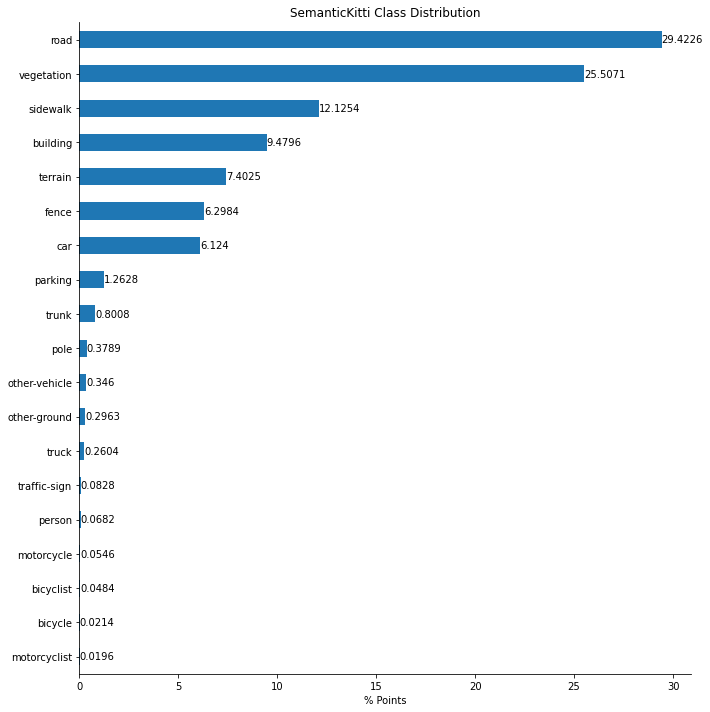

In [53]:
total_per = df.percentage.round(4).sort_values(ascending=True).plot.barh()
total_per.set_xlabel("% Points")
total_per.bar_label(total_per.containers[0])
total_per.set_title("SemanticKitti Class Distribution")
total_per.spines['top'].set_visible(False)
total_per.spines['right'].set_visible(False)
total_per.get_figure().tight_layout()

In [54]:
total_per.get_figure().savefig("data_distribution.png")